# Pymaceuticals Drug Data Analysis

## Observations and Insights 
- The average and final tumor volumes in the Capomulin group are similar to those of the Ramicane group, but significantly lower than all the other drug regimens. This suggests that Capomulin is among the best treatments in this study, and comparable to Ramicane.


- Looking at the tumor volume as a function of time for a mouse treated with Capomulin shows that the drug is effective at reducing the tumor volume.


- There is a fairly strong correlation between the weight of the mouse and the volume of its tumor. This is worth noting in case there are significant differences in mouse weights across the study groups.


- Capomulin and Ramicane have the highest number of total time points collected. With the limited information I was provided, I do not know if this is because the mouse died, or the data was not collected for other reasons. Potentially a source of bias. 

## Setup

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
num_mice = len(combined_data["Mouse ID"].unique())

pd.DataFrame({"Number of Mice": [num_mice]})

,Number of Mice
0,249


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# First group by both ID and Timepoint and count number of entries
data_count = combined_data.groupby(["Mouse ID", "Timepoint"]).count()

# If any counts are greater than one, store the ID in a list
duplicate_mice = data_count[data_count["Sex"] > 1].reset_index()["Mouse ID"].unique()

# Display duplicate mice
pd.DataFrame({"Duplicate Mouse ID": duplicate_mice})

,Duplicate Mouse ID
0,g989


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data[combined_data["Mouse ID"].isin(duplicate_mice)]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[~combined_data["Mouse ID"].isin(duplicate_mice)]

In [8]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_data["Mouse ID"].unique())

pd.DataFrame({"Number of Mice After Cleaning": [num_mice]})

,Number of Mice After Cleaning
0,248


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Group by drug
drug_group = clean_data.groupby("Drug Regimen")

# Get mean tumor volume as series and rename
means = drug_group["Tumor Volume (mm3)"].mean()
means.name = "mean"

# Get median tumor volume as series and rename
medians = drug_group["Tumor Volume (mm3)"].median()
medians.name = "median"

# Calculate variances
variances = drug_group["Tumor Volume (mm3)"].var()
variances.name = "var"

# Standard deviations
stds = drug_group["Tumor Volume (mm3)"].std()
stds.name = "std"

# Standard error of the mean (SEM)
sems = drug_group["Tumor Volume (mm3)"].sem()
sems.name = "sem"

# Assemble above into a data frame
summary_df = pd.concat([means, medians, variances, stds, sems], axis=1)

# Formatting - round to 2 decimals for cleanliness
summary_df = summary_df.applymap("{:.2f}".format)
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_group["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem']).applymap("{:.2f}".format)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

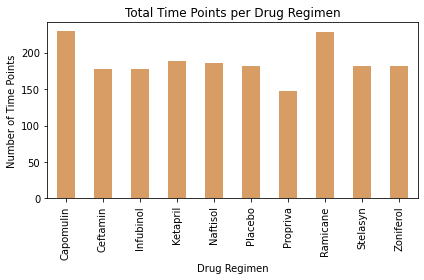

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Get the data grouped by drug and count the number of entries
timepoint_count = drug_group["Timepoint"].count()

# Put the above series into a data frame and rename timepoint column
df = pd.DataFrame(timepoint_count)
df = df.rename(columns={"Timepoint": "Total Time Points"})

# Plot bar graph
df.plot(kind='bar', y="Total Time Points", title="Total Time Points per Drug Regimen", color='peru', alpha=0.8, legend=False)
plt.ylabel("Number of Time Points")
plt.tight_layout()
plt.show()

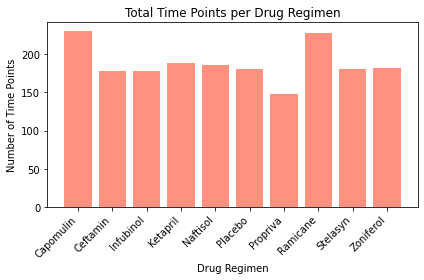

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Plot bar
plt.bar(df.index, df["Total Time Points"], color='tomato', alpha=0.7)

# Set title and axis labels and settings
plt.title("Total Time Points per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Time Points")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

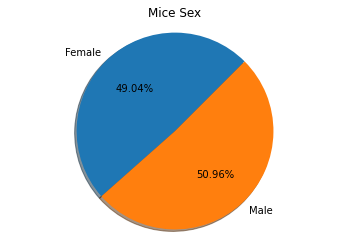

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df = pd.DataFrame(clean_data.groupby("Sex")["Mouse ID"].count())

df.plot(kind='pie', y="Mouse ID", legend=False, shadow=True, autopct="%0.2f%%", startangle=45)

plt.ylabel(None)
plt.title("Mice Sex")

plt.axis("equal")
plt.show()

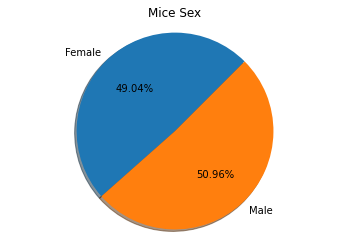

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(df["Mouse ID"], labels=df.index, autopct="%0.2f%%", shadow=True, startangle=45)
plt.title("Mice Sex")

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_data.groupby("Mouse ID")["Timepoint"].max()
last_timepoints.rename("Last Timepoint", inplace=True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
clean_data = clean_data.merge(last_timepoints, on="Mouse ID")
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [52]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []

# List for storing row indices of outliers in data
outlier_idx = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = clean_data[clean_data["Drug Regimen"] == drug]
    tumors = drug_data[drug_data["Last Timepoint"] == drug_data["Timepoint"]]["Tumor Volume (mm3)"]

    # add subset 
    tumor_vols.append(tumors)

    # Determine outliers using upper and lower bounds (for current subset)
    upperq = tumors.quantile(.75)
    lowerq = tumors.quantile(.25)
    iqr = upperq - lowerq
    
    upper_bound = upperq + 1.5 * iqr
    lower_bound = lowerq - 1.5 * iqr
    
    # Add row indices of outliers of current subset to final list
    outlier_idx.extend([index for index in tumors.index if ~(lower_bound < tumors[index] < upper_bound)])
    
# Display all rows in data frame that contain outliers
print("Potential Outliers:")
clean_data.iloc[outlier_idx]

Potential Outliers:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
669,c326,Infubinol,Female,18,25,5,36.321346,0,5


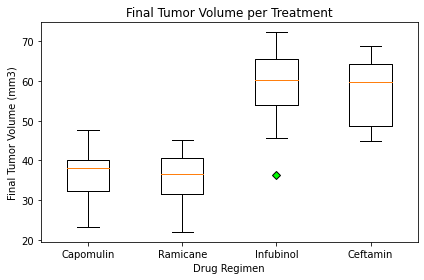

In [49]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vols, labels=drugs, flierprops={'markerfacecolor': 'lime', 'marker': 'D'})

plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volume per Treatment")

plt.tight_layout()
plt.show()

## Line and Scatter Plots

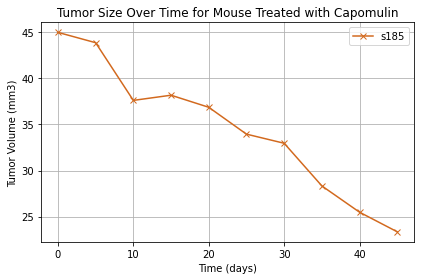

In [53]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Filter for only those treated with Capomulin
df = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

# Extract data using just the first mouse as a representative
mouse = df["Mouse ID"].iloc[0]
mouse_df = df[df["Mouse ID"] == mouse]

# Create line plot
plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"], color='chocolate', marker='x')
plt.legend(loc='best', labels=[mouse])

plt.title("Tumor Size Over Time for Mouse Treated with Capomulin")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.grid()
plt.tight_layout()
plt.show()

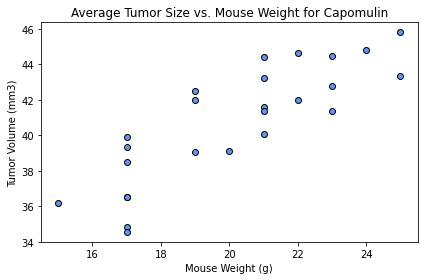

In [56]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
data = df.groupby("Mouse ID").mean()[["Weight (g)", "Tumor Volume (mm3)"]]

plt.scatter(data["Weight (g)"], data["Tumor Volume (mm3)"], facecolor='cornflowerblue', edgecolor='k', marker='o')

plt.title("Average Tumor Size vs. Mouse Weight for Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.tight_layout()
plt.show()

## Correlation and Regression

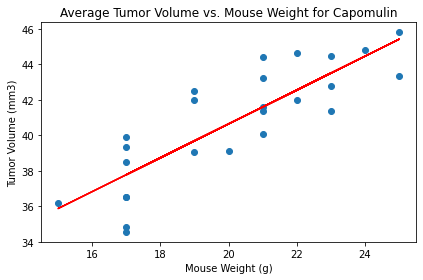

The Pearson correlation coefficient is: 0.84


In [57]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_weight = data["Weight (g)"]
avg_tumor_vols = data["Tumor Volume (mm3)"]

corr = st.pearsonr(mouse_weight, avg_tumor_vols)[0]

(slope, intercept, _, _, _) = st.linregress(mouse_weight, avg_tumor_vols)
regress = slope*mouse_weight + intercept

plt.plot(mouse_weight, regress, 'r')
plt.scatter(mouse_weight, avg_tumor_vols)

plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Mouse Weight (g)')

plt.tight_layout()
plt.show()

print(f"The Pearson correlation coefficient is: {round(corr, 2)}")